In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv("D:/Data Science/loan dataset/loan.csv")

D:\Data Science\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## using requisite columns and random sample of 10000 data points

In [32]:
use_cols = [
    'loan_amnt', 'int_rate', 'annual_inc', 'open_acc', 'loan_status',
    'open_il_12m'
] ## these are numerical varibales 
data=pd.read_csv("D:/Data Science/loan dataset/loan.csv",usecols=use_cols).sample(10000,random_state=44)

## Distribution of continuous variables

Text(0, 0.5, 'Number of Loans')

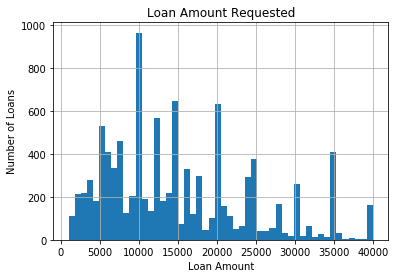

In [10]:
fig = data.loan_amnt.hist(bins=50)

fig.set_title('Loan Amount Requested')
fig.set_xlabel('Loan Amount')
fig.set_ylabel('Number of Loans')

Text(0, 0.5, 'Number of Loans')

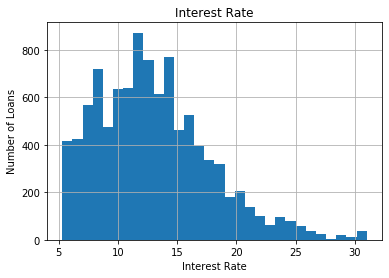

In [11]:
fig = data.int_rate.hist(bins=30)

fig.set_title('Interest Rate')
fig.set_xlabel('Interest Rate')
fig.set_ylabel('Number of Loans')

Text(0, 0.5, 'Number of Customers')

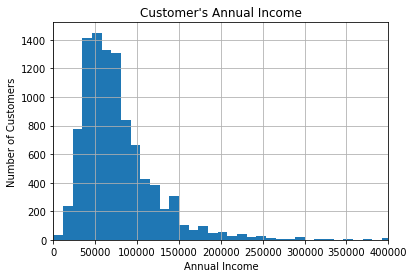

In [12]:
fig = data.annual_inc.hist(bins=100)
fig.set_xlim(0, 400000) ##for better visualisation
fig.set_title("Customer's Annual Income")
fig.set_xlabel('Annual Income')
fig.set_ylabel('Number of Customers')

## Distribution for discrete variables

Text(0, 0.5, 'Number of Customers')

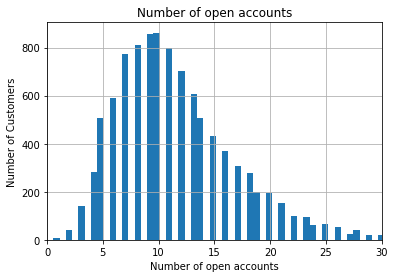

In [14]:
fig = data.open_acc.hist(bins=100)
fig.set_xlim(0, 30)
# open_acc contains information about various credit limes open for an individual e.g mortgages,car loans,credit card
# title and axis legends
fig.set_title('Number of open accounts')
fig.set_xlabel('Number of open accounts')
fig.set_ylabel('Number of Customers')

Text(0, 0.5, 'Number of Borrowers')

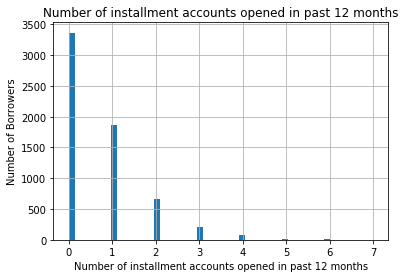

In [16]:
fig = data.open_il_12m.hist(bins=50) ##open_il_12m means Number of installment accounts opened in past 12 months
fig.set_title('Number of installment accounts opened in past 12 months')
fig.set_xlabel('Number of installment accounts opened in past 12 months')
fig.set_ylabel('Number of Borrowers')

In [34]:
data.loan_status.unique()

array(['Current', 'Charged Off', 'Fully Paid',
       'Does not meet the credit policy. Status:Fully Paid',
       'Late (16-30 days)', 'Late (31-120 days)', 'In Grace Period',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [36]:
## we can classify individuals into binary classes based on whether they have defaulted or not
data['defaulted'] = np.where(data.loan_status.isin(['Default']), 1, 0)

In [37]:
## analysis with categorical varibales
# Variable definitions:
#-------------------------
# purpose: intended use of the loan
# loan_status: loan statues, defaulted, paid, etc
# home_ownership: whether the borrower owns or rents their property

use_cols = ['id', 'purpose', 'loan_status', 'home_ownership']

data = pd.read_csv("D:/Data Science/loan dataset/loan.csv", usecols=use_cols).sample(
    10000, random_state=44)  # set a seed for reproducibility

data.head()

,id,home_ownership,loan_status,purpose
70642,NaN,MORTGAGE,Current,other
490788,NaN,MORTGAGE,Current,debt_consolidation
2081591,NaN,MORTGAGE,Charged Off,debt_consolidation
900431,NaN,MORTGAGE,Fully Paid,home_improvement
781582,NaN,MORTGAGE,Fully Paid,debt_consolidation


In [38]:
data.home_ownership.unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'OTHER'], dtype=object)

Text(0, 0.5, 'Number of customers')

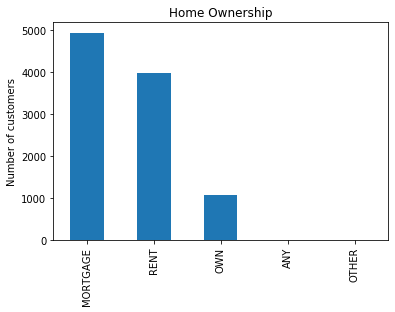

In [39]:
fig = data['home_ownership'].value_counts().plot.bar()
fig.set_title('Home Ownership')
fig.set_ylabel('Number of customers')

Text(0, 0.5, 'Number of customers')

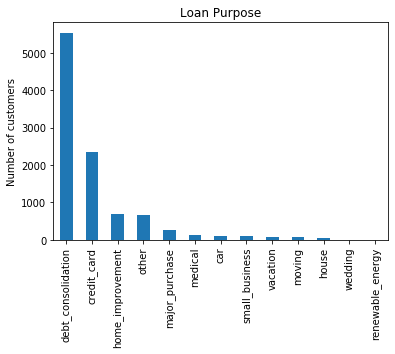

In [40]:
fig = data['purpose'].value_counts().plot.bar()
fig.set_title('Loan Purpose')
fig.set_ylabel('Number of customers')

Debt consolidation means that the borrower would like a loan to cancel previous debts

Text(0, 0.5, 'Number of customers')

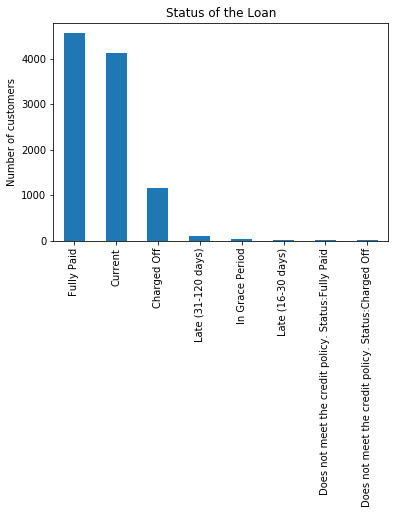

In [41]:
fig = data['loan_status'].value_counts().plot.bar()
fig.set_title('Status of the Loan')
fig.set_ylabel('Number of customers')

In [43]:
## analysis with some more additional columns

# Variable definitions:
#-------------------------
# loan_amnt: loan amount requested by borrower
# grade: risk markets in which borrowers are placed
# purpose: intended use of the loan
# issue_d: date the loan was issued
# last_pymnt_d: date of last payment towards repyaing the loan

use_cols = ['loan_amnt', 'grade', 'purpose', 'issue_d', 'last_pymnt_d']

data = pd.read_csv('D:/Data Science/loan dataset/loan.csv', usecols=use_cols)

data.head()

,loan_amnt,grade,issue_d,purpose,last_pymnt_d
0,2500,C,Dec-2018,debt_consolidation,Feb-2019
1,30000,D,Dec-2018,debt_consolidation,Feb-2019
2,5000,D,Dec-2018,debt_consolidation,Feb-2019
3,4000,D,Dec-2018,debt_consolidation,Feb-2019
4,30000,C,Dec-2018,debt_consolidation,Feb-2019


In [44]:
data.dtypes

loan_amnt        int64
grade           object
issue_d         object
purpose         object
last_pymnt_d    object
dtype: object

In [45]:
data['issue_dt'] = pd.to_datetime(data.issue_d)
data['last_pymnt_dt'] = pd.to_datetime(data.last_pymnt_d)

data[['issue_d', 'issue_dt', 'last_pymnt_d', 'last_pymnt_dt']].head()

,issue_d,issue_dt,last_pymnt_d,last_pymnt_dt
0,Dec-2018,2018-12-01,Feb-2019,2019-02-01
1,Dec-2018,2018-12-01,Feb-2019,2019-02-01
2,Dec-2018,2018-12-01,Feb-2019,2019-02-01
3,Dec-2018,2018-12-01,Feb-2019,2019-02-01
4,Dec-2018,2018-12-01,Feb-2019,2019-02-01


In [48]:
data.groupby(['issue_dt','grade'])['loan_amnt'].sum().unstack()

grade,A,B,C,D,E,F,G
issue_dt,,,,,,,
2007-06-01,25600.0,23625.0,32850.0,1275.0,8500.0,NaN,NaN
2007-07-01,72750.0,36600.0,105350.0,49375.0,35850.0,36700.0,11700.0
2007-08-01,76850.0,60550.0,51725.0,63900.0,70500.0,118800.0,72975.0
2007-09-01,34500.0,64725.0,62875.0,31550.0,36400.0,76450.0,66450.0
2007-10-01,47700.0,53275.0,170525.0,124575.0,142350.0,117725.0,97075.0
...,...,...,...,...,...,...,...
2018-08-01,214866400.0,204873700.0,183717775.0,101497300.0,25257575.0,7538325.0,1985025.0
2018-09-01,199957025.0,170989225.0,148304850.0,86592225.0,22135600.0,6115525.0,1300325.0
2018-10-01,232693850.0,208821350.0,176067225.0,94842475.0,27580425.0,4964700.0,1161450.0


Text(17.200000000000003, 0.5, 'Disbursed Amount (US Dollars)')

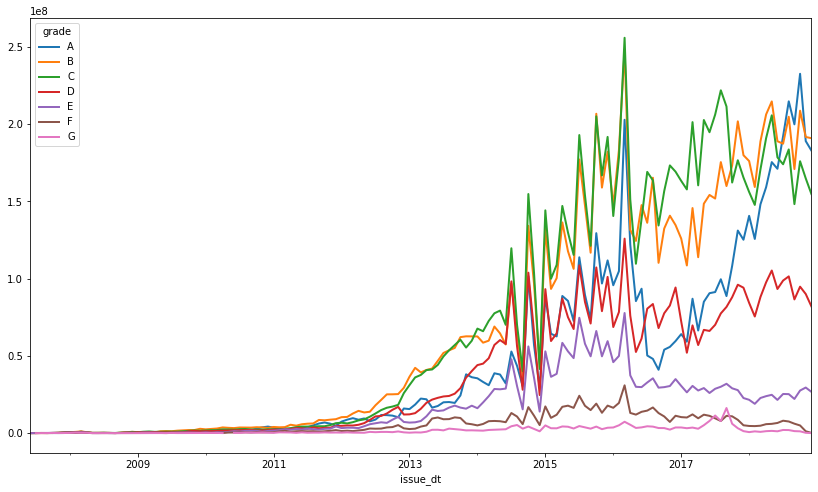

In [49]:
data.groupby(['issue_dt','grade'])['loan_amnt'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('Disbursed amount in time')
fig.set_ylabel('Disbursed Amount (US Dollars)')